In [1]:
# uptade de versão se necessário
#!pip install -U spacy

In [2]:
#Documentos utilizados
# https://realpython.com/sentiment-analysis-python/
# https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [3]:
from collections import defaultdict

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import spacy
import multiprocessing as mp

In [4]:
df_imdb = pd.read_csv('./IMDB Dataset.csv')

In [5]:
df_imdb.count()

review       50000
sentiment    50000
dtype: int64

In [6]:
df_imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


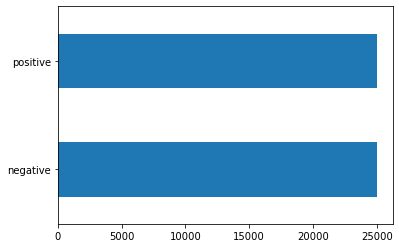

In [7]:
df_imdb.sentiment.value_counts().plot(kind = 'barh')

In [8]:
# df_imdb.sentiment.value_counts().plot(kind = 'barh')

In [9]:
# Carrega o modelo spacy em ingles e portugues
# !python -m spacy download en_core_web_sm
# !python -m spacy download pt_core_news_sm

#nlp = spacy.load("en_core_web_sm")

In [10]:
# Método para lidar com as tags HTML que podem aparecer 
# Ele foi tirado daqui: https://stackoverflow.com/questions/753052/strip-html-from-strings-in-python
#from io import StringIO
#from html.parser import HTMLParser
#
#class MLStripper(HTMLParser):
#    def __init__(self):
#        super().__init__()
#        self.reset()
#        self.strict = False
#        self.convert_charrefs= True
#        self.text = StringIO()
#    def handle_data(self, d):
#        self.text.write(d)
#    def get_data(self):
#        return self.text.getvalue()
#
#def strip_tags(html):
#    s = MLStripper()
#    s.feed(html)
#    return s.get_data()

In [11]:
from parallel import process_frame
nlp = spacy.load("en_core_web_sm")
    
pool = mp.Pool(mp.cpu_count()-2)

#some shared variables
m=mp.Manager()
vocab=m.list()    
total_words=m.Value('i',0)
    
for text in df_imdb['review']:
    
    # process each data frame
    job = pool.apply_async(process_frame,args=(nlp,text,vocab,total_words))


In [ ]:
total_words.value

In [13]:
len(vocab)

14183

In [ ]:
pool.close()
pool.join()

from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
 
print("now =", now)

# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)	

In [19]:
# salvar o vocab como csv
vocab_df = pd.DataFrame([vocab])  
vocab_df.head()

,0
0,[]


In [ ]:
# salvar o vocab como csv
#vocab_df.to_csv('vocab.csv')  
vocab_df.to_csv('vocab_count.csv')  

In [ ]:
# só manter elementos que aparecem pelo menos 1000 vezes
vocab_clean = { key:value for (key, value) in vocab.items() if value >= 1000}

In [ ]:
len(vocab_clean)

In [ ]:
vocab_clean_df = pd.DataFrame([vocab_clean])  
vocab_clean_df.to_csv('vocab_clean.csv')  

In [ ]:
vocab_columns = list(vocab_clean_df.columns.values)
len(vocab_columns)

In [ ]:
bow_vec = []      # list to store bag of words vectors
total_words = 0

for text in df_imdb['review']:
   
    #cria novo vetor
    doc_vec = []
    
    lemmas = create_lemmas_list(text)
    
    #conta total words. Não achei necessário, visto que já sabemos isso é 4993856 (dataset limpo)
    #total_words = total_words + len(lemmas)
    
    for vocab_item in vocab_columns: # iterate over vocab_clean 
        if vocab_item in lemmas: 
            doc_vec.append(lemmas.count(vocab_item)) # append freq if present
        else:
            doc_vec.append(0) # else append zero
            
    bow_vec.append(doc_vec)

In [ ]:
df_bag = pd.DataFrame(bow_vec, columns = vocab_columns)
df_bag.head()

In [ ]:
# adicionando os sentimentos
df_bag['sentiment_target'] = df_imdb['sentiment'].values

In [ ]:
df_bag.head()

In [ ]:
# Link do dataset no drive: https://drive.google.com/file/d/1lNDsJ1QeJTvvdlBR8TT6RLDe1ufP-2np/view?usp=sharing
# Este data set é muito grande para um commit
# df_bag.to_csv('bag_of_words.csv')  

# Salvar o dataset full
df_bag.to_csv('bag_of_words_full.csv')

In [ ]:
df_bag.sentiment_target.value_counts().plot(kind = 'barh')